In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

tensorflow 2.5.0-dev20201229
keras 2.5.0


In [4]:
model = keras.applications.VGG16(weights='imagenet')
model.summary()

553467904/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

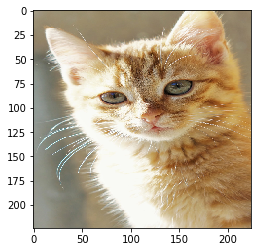

In [11]:
# Load the image
_img = keras.preprocessing.image.load_img('/Users/ukannika/Downloads/cat.jpeg',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [16]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)
np.argmax(y_pred)

281

In [23]:
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [24]:
dgrad_abs = tf.math.abs(grads)

In [26]:
# To get the saliency map we need to find the max of the absolute values of the gradient along each RGB channel
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]


In [27]:
# Normalize the grad to between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)


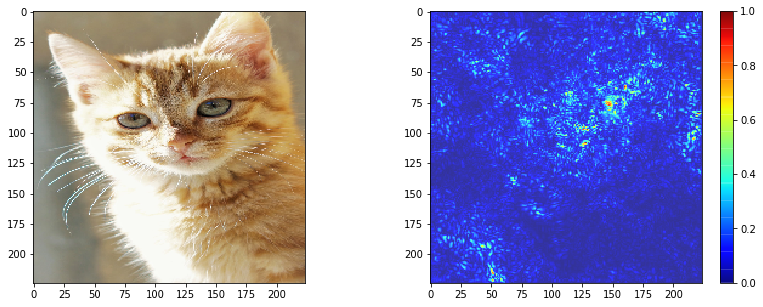

In [28]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

In [29]:
# Above approach is Vanilla Gradient Approach

# In neural nets, we have non linear activation functions. so using backprop will improve the performance. 
# Rectified and guided backprop